In [36]:
from Bio import SeqIO
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import re

#### 1. Clean sequence id and remove any sequences   
(1) containing non-standard amino acids  
(2) longer than 2000.   
(3) shorter than 100


In the end, produce a fasta file with following format:  
\>seq_id org_strain domain ogt  
SEQUENCE

For example:  
\>WP_010045158.1 gemmata_obscuriglobus bacteria 30  
  
Make sure each id is unique in the dataset

In [10]:
def load_seq_info(infile):
    # return {'Q8TZM9':[pyrococcus_furiosus,archaea,96]}
    seq_info = dict()
    for line in open(infile):
        if line.startswith('ec'): continue
        cont = line.split()
        seq_info[cont[1]] = '{0} {1} {2}'.format(cont[3],cont[2].lower(),cont[4]) 
    print('Number of sequences with info:',len(seq_info))
    return seq_info

In [5]:
def is_valid_seq(seq, max_len=2000,min_len=100):
    """
    True if seq is valid, False otherwise.
    """
    l = len(seq)
    valid_aas = "ACDEFGHIKLMNPQRSTVWY"
    if (l <= max_len) and set(seq) <= set(valid_aas) and l>=min_len: return True
    else: return False

In [23]:
def clean_sequences(seqfile):
    cleaned_seqs = dict()
    k = 0
    for rec in SeqIO.parse(seqfile,'fasta'):
        k += 1
        if not is_valid_seq(str(rec.seq)): continue
        if len(rec.id) == 0: continue
        cleaned_seqs[rec.id] = rec
    print('Number of sequences after clean',len(cleaned_seqs))
    print('Number of removed sequences:',k-len(cleaned_seqs))
    return cleaned_seqs

In [24]:
def save_cleaned_seqs(seq_info,cleaned_seqs,outfile):
    fhand = open(outfile,'w')
    for seqid, rec in cleaned_seqs.items():
        try:
            rec.description = seq_info[seqid]
            SeqIO.write([rec],fhand,'fasta')
        except: pass
    fhand.close()

In [12]:
seq_info = load_seq_info('../data/enzyme_ogt_topt.tsv')

Number of sequences with info: 6270107


In [25]:
cleaned_seqs = clean_sequences('../data/brenda_sequences_20180109.fasta')

Number of sequences after clean 11299024
Number of removed sequences: 425578


In [26]:
save_cleaned_seqs(seq_info,cleaned_seqs,'../data/cleaned_seqs_1.0.fasta')

#### 2. Remove sequences in topt dataset from ogt dataset. Reformat the fasta file with following format
\>Uniprot_id OGT  
SEQUENCE

In [44]:
def topt_seqs(infile):
    is_topt_seq = dict()
    for line in open(infile):
        if not line.startswith('>'): continue
        cont = line[1:].strip().split()
        is_topt_seq[cont[0]] = True
    return is_topt_seq

In [45]:
def reformat_ogt_dataset(infile,outfile,is_topt_seq):
    num_seq_in_topt = 0
    recs = list()
    ogts = list()
    for rec in SeqIO.parse(infile,'fasta'):
        if is_topt_seq.get(rec.id,False):
            num_seq_in_topt += 1
            continue
        ogt = float(rec.description.split()[-1])
        ogts.append(ogt)
        rec.description = str(ogt)
        recs.append(rec)
    
    fhand = open(outfile,'w')
    SeqIO.write(recs,fhand,'fasta')
    fhand.close()
    
    
    plt.hist(ogts,50)
    plt.show()

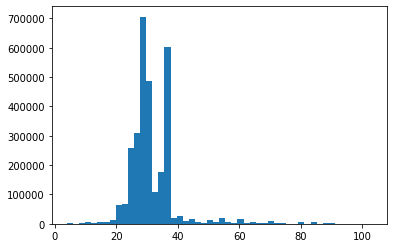

In [48]:
is_topt_seq = topt_seqs('../data/cleaned_enzyme_topts_v1.fasta')
reformat_ogt_dataset('../data/cleaned_seqs_2.0.fasta',
                     '../data/cleaned_ogts.fasta',is_topt_seq)

In [49]:
!head ../data/cleaned_ogts.fasta

>A0A229RQY8 28.0
MSGSVILGAARTPIGRLLGSLKDFSGAQLGGFAIKAALEQAGVSPDAVQYTIMGQVLTAG
AGQIPARQAAVAGGIPMTVPALTINKVCLSGLDAIALADQLIRAGEFDLIVAGGQESMTQ
SPHLLPKSRAGFKYGDTTLVDHMAYDGLFCAFDQVAMGASTEKYNSRYGLTREQQDEFSA
RSHQRAAAAIEAGRFDAEIAPVSIPQRKGDPVVFSKDEGVRADTTAEGLAKLRPAFASDG
TITAGSASQISDGAAAVIVASKAKAEELGLTPLAEIGAHGVVSGPDASLHEQPSNAILAA
LAKEKLTADALDLVEINEAFAAVGLVSAEKLGLDPEKVNVDGGAIALGHPIGASGARLAV
HLIHELRRRGGGLGAAALCGGGGQGDALLLRVP
>A0A1G4G7X9 37.0
MAKEIKFSLLYRDMWQSSGKYVPTVDQLLEVAPAIIDMGCFARVETNGGGFEQINLLFGE


#### Visualize the OGT distribution

In [58]:
def plot_ogt_distribution(infile,outname=None,log=False):
    ogts = [float(line.split()[-1]) for line in open(infile) if line.startswith('>')]
    print(len(ogts))
    plt.figure(figsize=(4,3))
    n, bins, patches=plt.hist(ogts,21)
    plt.xlabel('OGT ($^\circ$C)')
    plt.ylabel('Count')
    plt.title('{0} sequences'.format(len(ogts)))
    if log: plt.yscale('log')
    plt.tight_layout()
    if outname is not None: plt.savefig(outname)
    
    plt.show()
    return n, bins, patches

In [29]:
ogts = [float(line.strip().split()[-1]) for line in open('../data/cleaned_seqs_2.0.fasta') if line.startswith('>')]

3015505


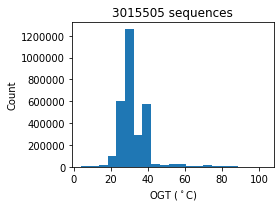

(array([4.313000e+03, 9.686000e+03, 2.001000e+04, 1.019960e+05,
        6.041930e+05, 1.259423e+06, 2.890590e+05, 5.787480e+05,
        2.780200e+04, 1.865400e+04, 2.507400e+04, 2.428900e+04,
        1.035500e+04, 6.872000e+03, 1.322700e+04, 3.938000e+03,
        6.340000e+03, 6.618000e+03, 2.580000e+03, 1.769000e+03,
        5.590000e+02]),
 array([  4.        ,   8.71428571,  13.42857143,  18.14285714,
         22.85714286,  27.57142857,  32.28571429,  37.        ,
         41.71428571,  46.42857143,  51.14285714,  55.85714286,
         60.57142857,  65.28571429,  70.        ,  74.71428571,
         79.42857143,  84.14285714,  88.85714286,  93.57142857,
         98.28571429, 103.        ]),
 <a list of 21 Patch objects>)

In [59]:
plot_ogt_distribution('../data/cleaned_ogts.fasta',outname = '../figures/cleaned_ogts.pdf')

3015505


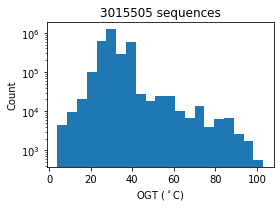

(array([4.313000e+03, 9.686000e+03, 2.001000e+04, 1.019960e+05,
        6.041930e+05, 1.259423e+06, 2.890590e+05, 5.787480e+05,
        2.780200e+04, 1.865400e+04, 2.507400e+04, 2.428900e+04,
        1.035500e+04, 6.872000e+03, 1.322700e+04, 3.938000e+03,
        6.340000e+03, 6.618000e+03, 2.580000e+03, 1.769000e+03,
        5.590000e+02]),
 array([  4.        ,   8.71428571,  13.42857143,  18.14285714,
         22.85714286,  27.57142857,  32.28571429,  37.        ,
         41.71428571,  46.42857143,  51.14285714,  55.85714286,
         60.57142857,  65.28571429,  70.        ,  74.71428571,
         79.42857143,  84.14285714,  88.85714286,  93.57142857,
         98.28571429, 103.        ]),
 <a list of 21 Patch objects>)

In [60]:
plot_ogt_distribution('../data/cleaned_ogts.fasta',log=True,outname = '../figures/cleaned_ogts_log.pdf')

In [51]:
!less ../data/cleaned_topts.fasta|grep '>'|wc -l

1902


In [52]:
!less ../data/cleaned_ogts.fasta|grep '>'|wc -l

3015505


In [55]:
print('{0} enzymes were removed from OGT dataset since they are in Topt dataset'.format(-3015505+3016273))

768 enzymes were removed from OGT dataset since they are in Topt dataset
